# Financial News Sentiment Analysis | Feature Engineering, EDA, and Modeling

Table of Contents

1.Data Preprocessing
.Importing Libraries
.Reading in a dataset
.Exploratory Data Analysis

2.Feature Engineering
.Processing for Missing Values and Outliers
.Creating New Feature Interactions

3.Modeling
.Processing Encoding & One-Hot Encoding
.Standardization for Numerical Variables
.Create Modeling

4.Summary

# Install Liabraries:

In [1]:
import pandas as pd
import numpy as np


# Data Visualization
import matplotlib.pyplot as plt
from matplotlib import colors
import plotly.offline as pyo
import seaborn as sns
from termcolor import colored
import plotly.express as px
import warnings


# Data Clustering
from yellowbrick.cluster import KElbowVisualizer
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# Color palette for plots
colorpalt = ["#d62828", "#f77f00", "#fcbf49", "#003049"]

# Plotting setup
sns.set(style="darkgrid",color_codes=True)
warnings.filterwarnings('ignore')
%matplotlib inline


from sklearn.feature_extraction.text import CountVectorizer

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB

from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

k=KNeighborsClassifier()
d=DecisionTreeClassifier()
r=RandomForestClassifier()
l=LogisticRegression()
mb=MultinomialNB()
    
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')  

In [2]:
!pip install xgboost

Defaulting to user installation because normal site-packages is not writeable


# Load Dataset

In [3]:
df = pd.read_csv("all-data.csv", encoding = "ISO-8859-1",  names=['sentiment', 'news'])
df.head()

,sentiment,news
0,neutral,"According to Gran , the company has no plans t..."
1,neutral,Technopolis plans to develop in stages an area...
2,negative,The international electronic industry company ...
3,positive,With the new production plant the company woul...
4,positive,According to the company 's updated strategy f...


# Understanding the Data
.Shape of the data

.Check column dtypes

.Check is there any null values

In [4]:
# Check for missing data
df.isnull().sum()

sentiment    0
news         0
dtype: int64

In [5]:
# dimensionality of the data
df.shape

(4846, 2)

In [6]:
df.describe()

,sentiment,news
count,4846,4846
unique,3,4838
top,neutral,TELECOMWORLDWIRE-7 April 2006-TJ Group Plc sel...
freq,2879,2


# Checking Duplicates

In [7]:
df[df.duplicated(['news'])]

,sentiment,news
79,positive,TELECOMWORLDWIRE-7 April 2006-TJ Group Plc sel...
789,neutral,The Group 's business is balanced by its broad...
1099,neutral,The issuer is solely responsible for the conte...
1416,neutral,The report profiles 614 companies including ma...
2396,neutral,Ahlstrom 's share is quoted on the NASDAQ OMX ...
2567,neutral,SSH Communications Security Corporation is hea...
3094,neutral,Proha Plc ( Euronext :7327 ) announced today (...
3206,neutral,The company serves customers in various indust...


# Drop Duplicates

In [8]:
df = df.drop_duplicates(subset={"sentiment", "news"}, keep='first', inplace=False)

In [9]:
df_no_duplicates = df.drop_duplicates()

In [10]:
df_dub_after_removal = df_no_duplicates.duplicated().any()
print("Are there duplicates after removal?", df_dub_after_removal)

Are there duplicates after removal? False


In [11]:
print("shape of the data :",df.shape)
print(colored('*'*42, 'blue'))

df.head()

shape of the data : (4840, 2)
******************************************


,sentiment,news
0,neutral,"According to Gran , the company has no plans t..."
1,neutral,Technopolis plans to develop in stages an area...
2,negative,The international electronic industry company ...
3,positive,With the new production plant the company woul...
4,positive,According to the company 's updated strategy f...


# Distribution of sentiment

In [12]:
df['sentiment'].value_counts()

neutral     2873
positive    1363
negative     604
Name: sentiment, dtype: int64

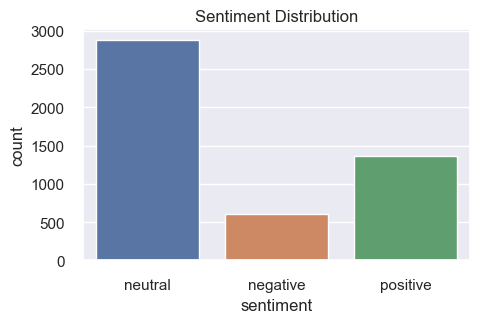

In [13]:
plt.figure(figsize=(5, 3))
sns.countplot(x='sentiment', data=df)
plt.title("Sentiment Distribution")
plt.show()

# Exploratory Data Analysis (EDA) on the required Features:

In [14]:
pip install textblob

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [15]:
from textblob import TextBlob

df['polarity'] = df['news'].map(lambda text: TextBlob(text).sentiment.polarity)
df['news_len'] = df['news'].astype(str).apply(len)
df['word_count'] = df['news'].apply(lambda x: len(str(x).split()))

In [16]:
df

,sentiment,news,polarity,news_len,word_count
0,neutral,"According to Gran , the company has no plans t...",0.000000,127,25
1,neutral,Technopolis plans to develop in stages an area...,0.083333,190,31
2,negative,The international electronic industry company ...,0.000000,228,36
3,positive,With the new production plant the company woul...,-0.064802,206,33
4,positive,According to the company 's updated strategy f...,0.000000,203,41
...,...,...,...,...,...
4841,negative,LONDON MarketWatch -- Share prices ended lower...,-0.500000,144,26
4842,neutral,Rinkuskiai 's beer sales fell by 6.5 per cent ...,0.000000,148,30
4843,negative,Operating profit fell to EUR 35.4 mn from EUR ...,0.000000,108,23
4844,negative,Net sales of the Paper segment decreased to EU...,0.040000,226,44


In [17]:
print(df.columns)

Index(['sentiment', 'news', 'polarity', 'news_len', 'word_count'], dtype='object')


In [18]:
pip install wordcloud

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [19]:
from wordcloud import WordCloud,STOPWORDS

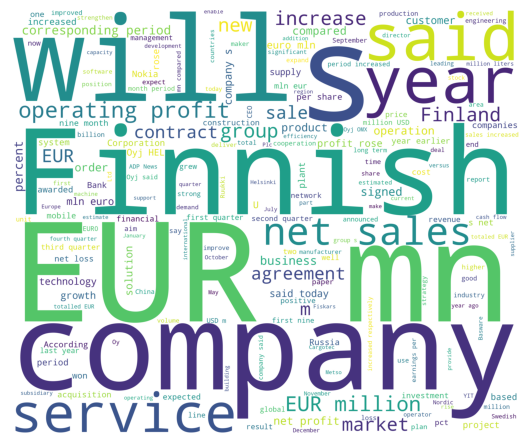

In [20]:
df1 = df[df['sentiment']=='positive']
words = ' '.join(df1['news'].astype(str))
cleaned_word = ' '.join([word for word in words.split() if not word.startswith('@')])

wordcloud = WordCloud(background_color='white',stopwords=STOPWORDS,
                      width=3000, height=2500).generate(''.join(cleaned_word))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

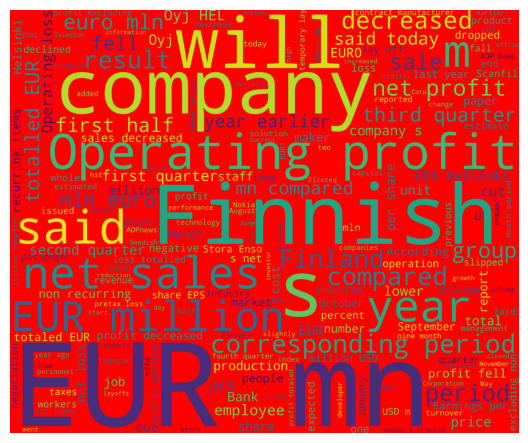

In [21]:
df2 = df[df['sentiment']=='negative']
words = ' '.join(df2['news'].astype(str))
cleaned_word = ' '.join([word for word in words.split() if not word.startswith('@')])

wordcloud = WordCloud(background_color='red',stopwords=STOPWORDS,
                      width=3000, height=2500).generate(''.join(cleaned_word))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

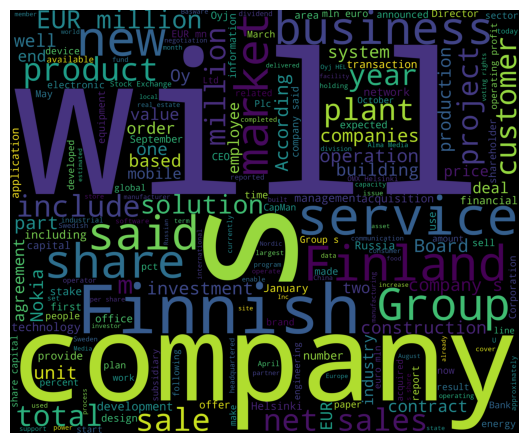

In [22]:
df3 = df[df['sentiment']=='neutral']
words = ' '.join(df3['news'].astype(str))
cleaned_word = ' '.join([word for word in words.split() if not word.startswith('@')])

wordcloud = WordCloud(background_color='black',stopwords=STOPWORDS,
                      width=3000, height=2500).generate(''.join(cleaned_word))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

# Drop Neutral Sentiment:

In [23]:
df = df[df.sentiment != "neutral"]
df.head()

,sentiment,news,polarity,news_len,word_count
2,negative,The international electronic industry company ...,0.000000,228,36
3,positive,With the new production plant the company woul...,-0.064802,206,33
4,positive,According to the company 's updated strategy f...,0.000000,203,41
5,positive,FINANCING OF ASPOCOMP 'S GROWTH Aspocomp is ag...,0.500000,178,25
6,positive,"For the last quarter of 2010 , Componenta 's n...",0.000000,193,39


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1967 entries, 2 to 4845
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   sentiment   1967 non-null   object 
 1   news        1967 non-null   object 
 2   polarity    1967 non-null   float64
 3   news_len    1967 non-null   int64  
 4   word_count  1967 non-null   int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 92.2+ KB


# Sentiment Distribution

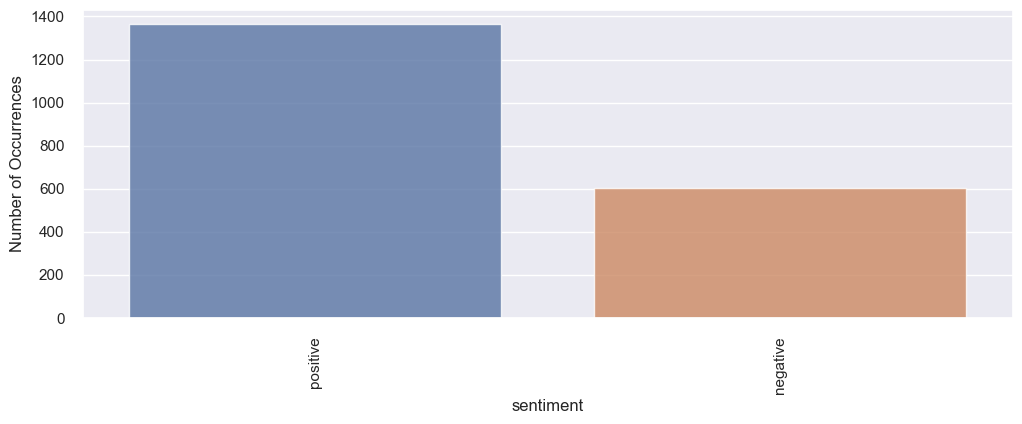

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

sentiment = df['sentiment'].value_counts()
plt.figure(figsize=(12,4))
sns.barplot(x=sentiment.index, y=sentiment.values, alpha=0.8)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('sentiment', fontsize=12)
plt.xticks(rotation=90)
plt.show();

Text(0.5, 1.0, 'Distribution')

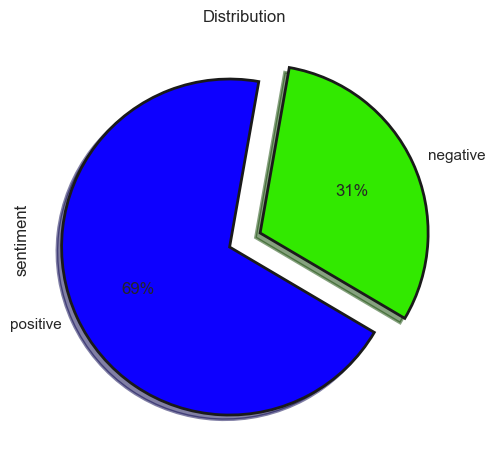

In [26]:
plt.figure(figsize=(18, 12))
plt.subplot(221)
df["sentiment"].value_counts().plot.pie(autopct="%1.0f%%", colors=sns.color_palette("prism", 5), startangle=80, labels=["positive", "negative"], wedgeprops={"linewidth": 2, "edgecolor": "k"}, explode=[0.1, 0.1], shadow=True)
plt.title("Distribution")

From the above plot positive news percentage is way too higher than negative news.

# Data preparation

### Data Cleaning

In [27]:
# from bs4 import BeautifulSoup

df["news"]=df["news"].str.lower() #We convert our texts to lowercase.
df["news"]=df["news"].str.replace("[^\w\s]","") #We remove punctuation marks from our texts.
df["news"]=df["news"].str.replace("\d+","") #We are removing numbers from our texts.
df["news"]=df["news"].str.replace("\n","").replace("\r","") #We remove spaces in our texts.

# def strip_html_tags(text):
#   soup = BeautifulSoup(text, "html.parser")
#   [s.extract() for s in soup(['iframe', 'script'])]
#   stripped_text = soup.get_text()
#   stripped_text = re.sub(r'[\r|\n|\r\n]+', '\n', stripped_text)
#   return stripped_text

# def remove_accented_chars(text):
#   text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')
#   return text

# def stopwords_removal(words):
#     list_stopwords = nltk.corpus.stopwords.words('english')
#     return [word for word in words if word not in list_stopwords]

In [28]:
df.head()

,sentiment,news,polarity,news_len,word_count
2,negative,the international electronic industry company ...,0.000000,228,36
3,positive,with the new production plant the company woul...,-0.064802,206,33
4,positive,according to the company s updated strategy fo...,0.000000,203,41
5,positive,financing of aspocomp s growth aspocomp is agg...,0.500000,178,25
6,positive,for the last quarter of componenta s net sal...,0.000000,193,39


In [29]:
#Summary satistics of numerical columns
df.describe(include=[np.number])

,polarity,news_len,word_count
count,1967.000000,1967.000000,1967.000000
mean,0.062010,132.610574,24.454499
std,0.205171,55.431965,10.013208
min,-0.800000,24.000000,5.000000
25%,0.000000,89.000000,17.000000
50%,0.000000,123.000000,23.000000
75%,0.125000,168.000000,31.000000
max,1.000000,298.000000,57.000000


In [30]:
#Summary of Categorical Columns
df.describe(include = 'object')

,sentiment,news
count,1967,1967
unique,2,1949
top,positive,operating profit rose to eur mn from eur mn ...
freq,1363,6


# Define a Function to grab the Numerical and Categorical variables of its dataset

In [31]:
def grab_col_names(dataframe, cat_th=10, car_th=20):

    # cat_cols, cat_but_car
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]
    
    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and
                   dataframe[col].dtypes != "O"]
    
    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and
                   dataframe[col].dtypes == "O"]
    
    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    # num_cols
    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]
    num_cols = [col for col in num_cols if col not in num_but_cat]

    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f'cat_cols: {len(cat_cols)}')
    print(f'num_cols: {len(num_cols)}')
    print(f'cat_but_car: {len(cat_but_car)}')
    print(f'num_but_cat: {len(num_but_cat)}')
    return cat_cols, num_cols, cat_but_car

cat_cols, num_cols, cat_but_car = grab_col_names(df)

Observations: 1967
Variables: 5
cat_cols: 1
num_cols: 3
cat_but_car: 1
num_but_cat: 0


In [32]:
# Target Variable Analysis
df.sentiment.value_counts()

positive    1363
negative     604
Name: sentiment, dtype: int64

In [33]:
num_cols

['polarity', 'news_len', 'word_count']

In [34]:
def target_summary_with_num(dataframe,target, numerical_col):
    print(dataframe.groupby(target).agg({numerical_col:"mean"}), end="\n\n")
    print("###################################")
    
for col in num_cols:
    target_summary_with_num(df,"sentiment",col)

           polarity
sentiment          
negative  -0.035585
positive   0.105259

###################################
             news_len
sentiment            
negative   125.756623
positive   135.647836

###################################
           word_count
sentiment            
negative    23.917219
positive    24.692590

###################################


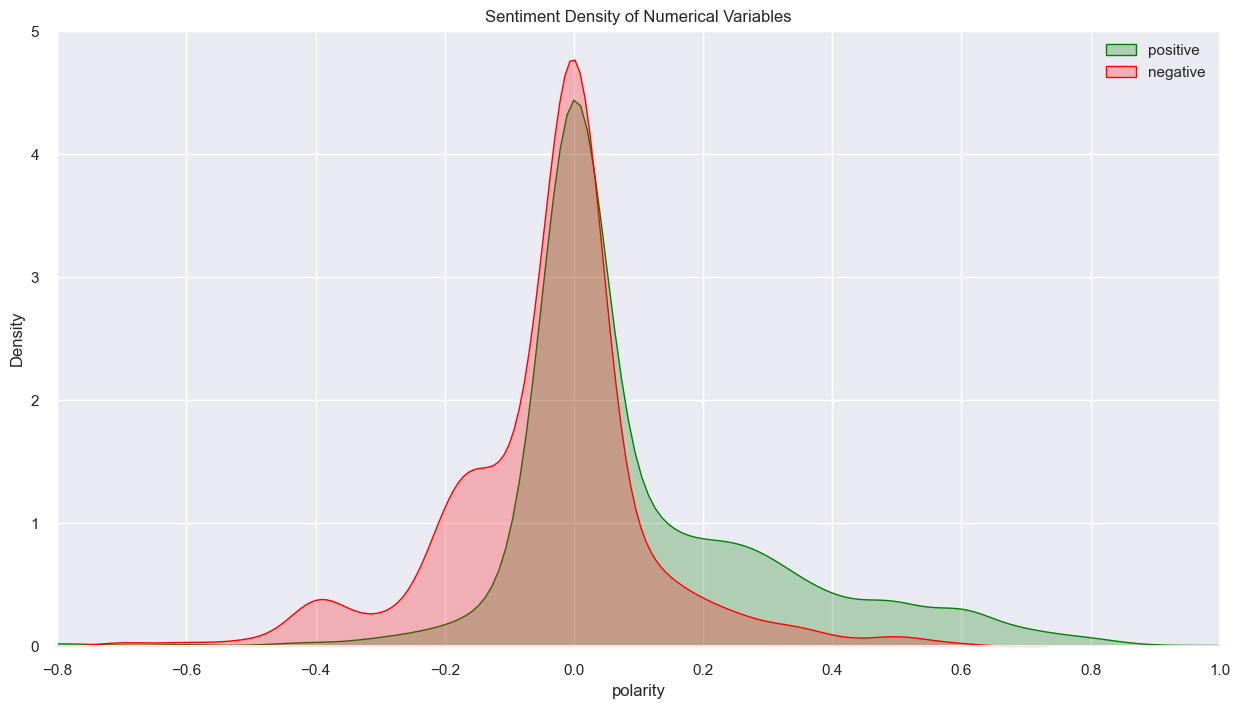

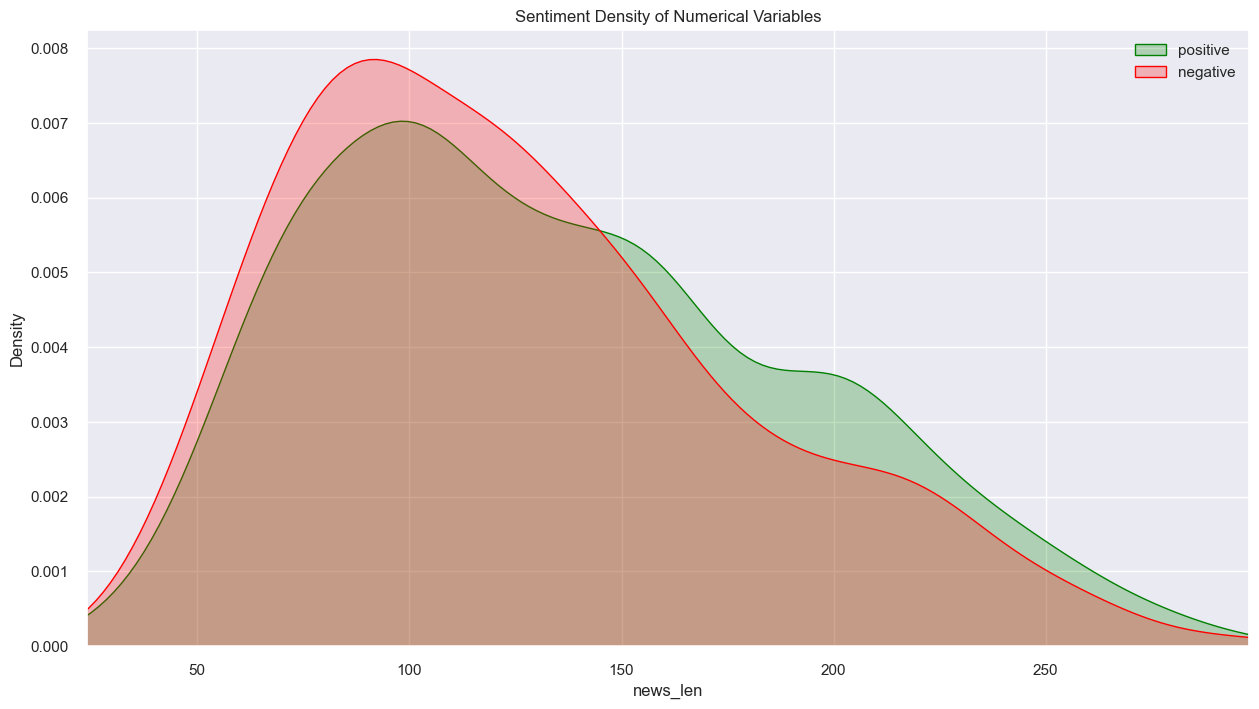

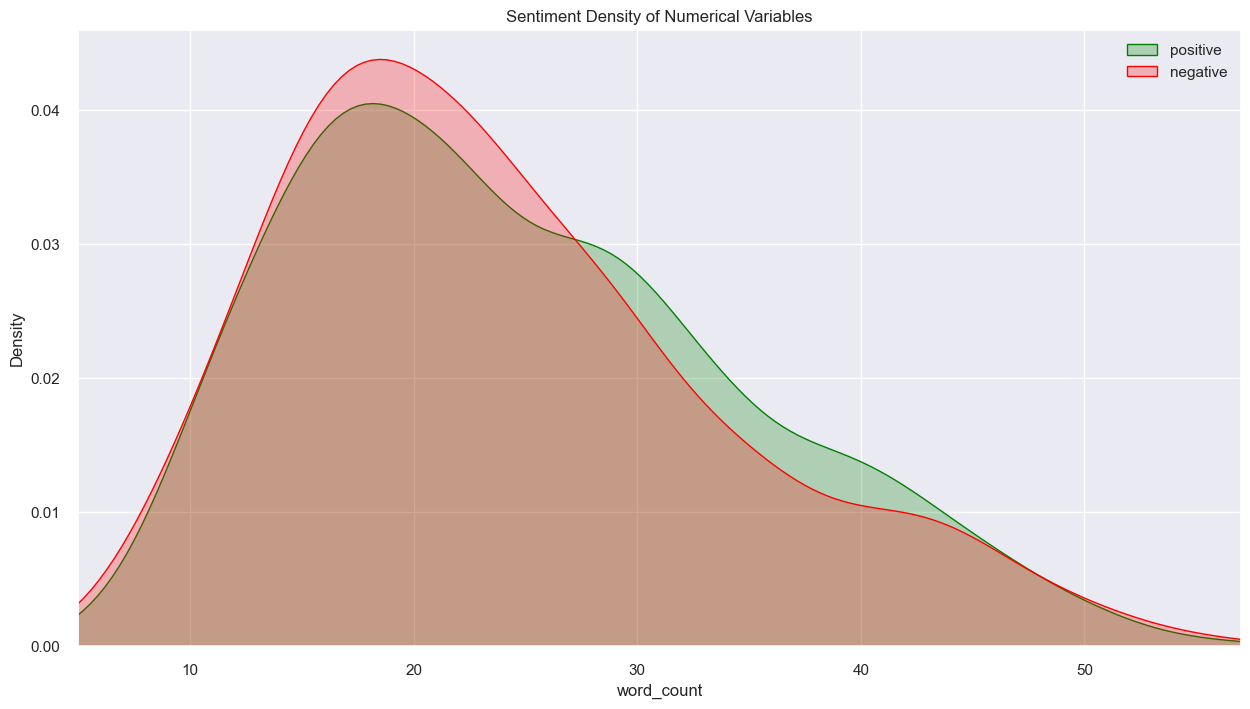

In [35]:
def target_density_est_with_num(dataframe,sentiment, numerical_col):
    plt.figure(figsize=(15,8))
    ax = sns.kdeplot(df[col][df.sentiment == 'positive'], color="green", shade=True)
    sns.kdeplot(df[col][df.sentiment == 'negative'], color="red", shade=True)
    plt.legend(['positive','negative'])
    plt.xlim(df[col].min(),df[col].max())
    plt.title("Sentiment Density of Numerical Variables")
    plt.show()
    
for col in num_cols:
    target_density_est_with_num(df,"sentiment",col)

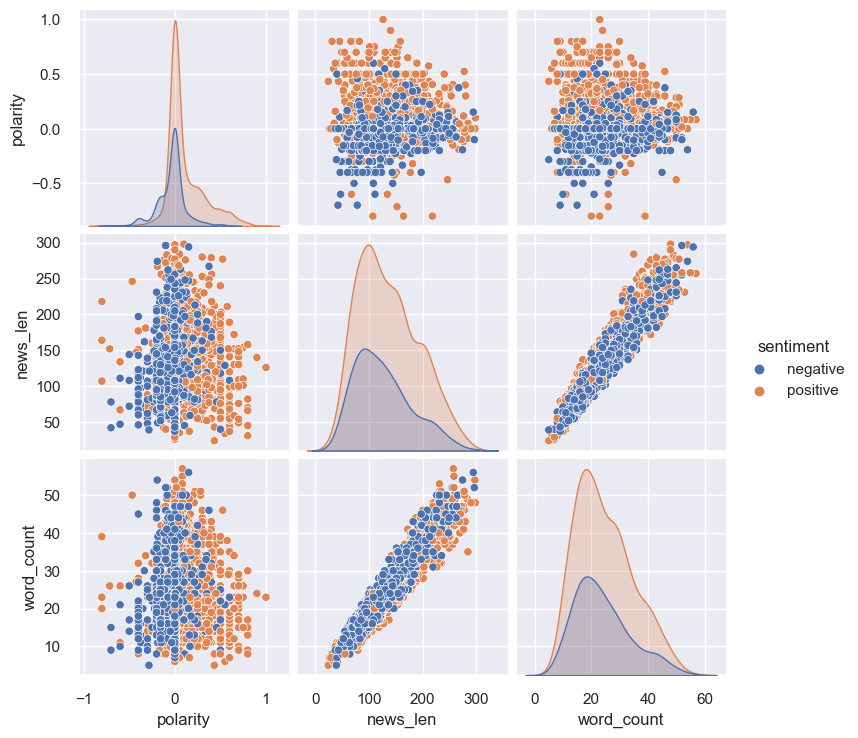

In [36]:
sns.pairplot(df, hue = 'sentiment' , vars=['polarity','news_len', 'word_count' ])

In [37]:
df_numeric = df[[ 'polarity', 'news_len', 'word_count']]

In [38]:
df_numeric.head()

,polarity,news_len,word_count
2,0.000000,228,36
3,-0.064802,206,33
4,0.000000,203,41
5,0.500000,178,25
6,0.000000,193,39


In [39]:
from scipy import stats

#Calculating Zscore of numeric columns in the dataset
z=np.abs(stats.zscore(df_numeric))
print (z)

      polarity  news_len  word_count
2     0.302315  1.721275    1.153320
3     0.618239  1.324292    0.853640
4     0.302315  1.270157    1.652788
5     2.135299  0.819039    0.054492
6     0.302315  1.089710    1.453001
...        ...       ...         ...
4840  0.246940  2.082170    1.552894
4841  2.739929  0.205519    0.154385
4843  0.302315  0.444091    0.145295
4844  0.107306  1.685186    1.952468
4845  1.277361  0.678672    0.544869

[1967 rows x 3 columns]


From these points it is very difficult to say which point is outliers so we will define threshold.


In [40]:
def outlier_th(dataframe, col_name, q1=0.25, q3=0.75):
    quartile1 = dataframe[col_name].quantile(q1)
    quartile3 = dataframe[col_name].quantile(q3)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit


In [41]:
def check_outlier(dataframe, col_name):
    low_limit, up_limit = outlier_th(dataframe, col_name)
    if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):
        return True
    else:
        return False

In [42]:
def replace_with_thresholds(dataframe, variable):
    low_limit, up_limit = outlier_th(dataframe, variable)
    dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
    dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit

In [43]:
for col in num_cols:
    print(col, check_outlier(df, col))

polarity True
news_len True
word_count True


In [44]:
for col in num_cols:
    replace_with_thresholds(df, col)

In [45]:
for col in num_cols:
    print(col, check_outlier(df, col))

polarity False
news_len False
word_count False


# Correlation Analysis

In [46]:
dimension_variable =["polarity", "news_len", "word_count"]
corr_matrix = df[dimension_variable].corr()
corr_matrix

,polarity,news_len,word_count
polarity,1.000000,0.030469,0.016919
news_len,0.030469,1.000000,0.954069
word_count,0.016919,0.954069,1.000000


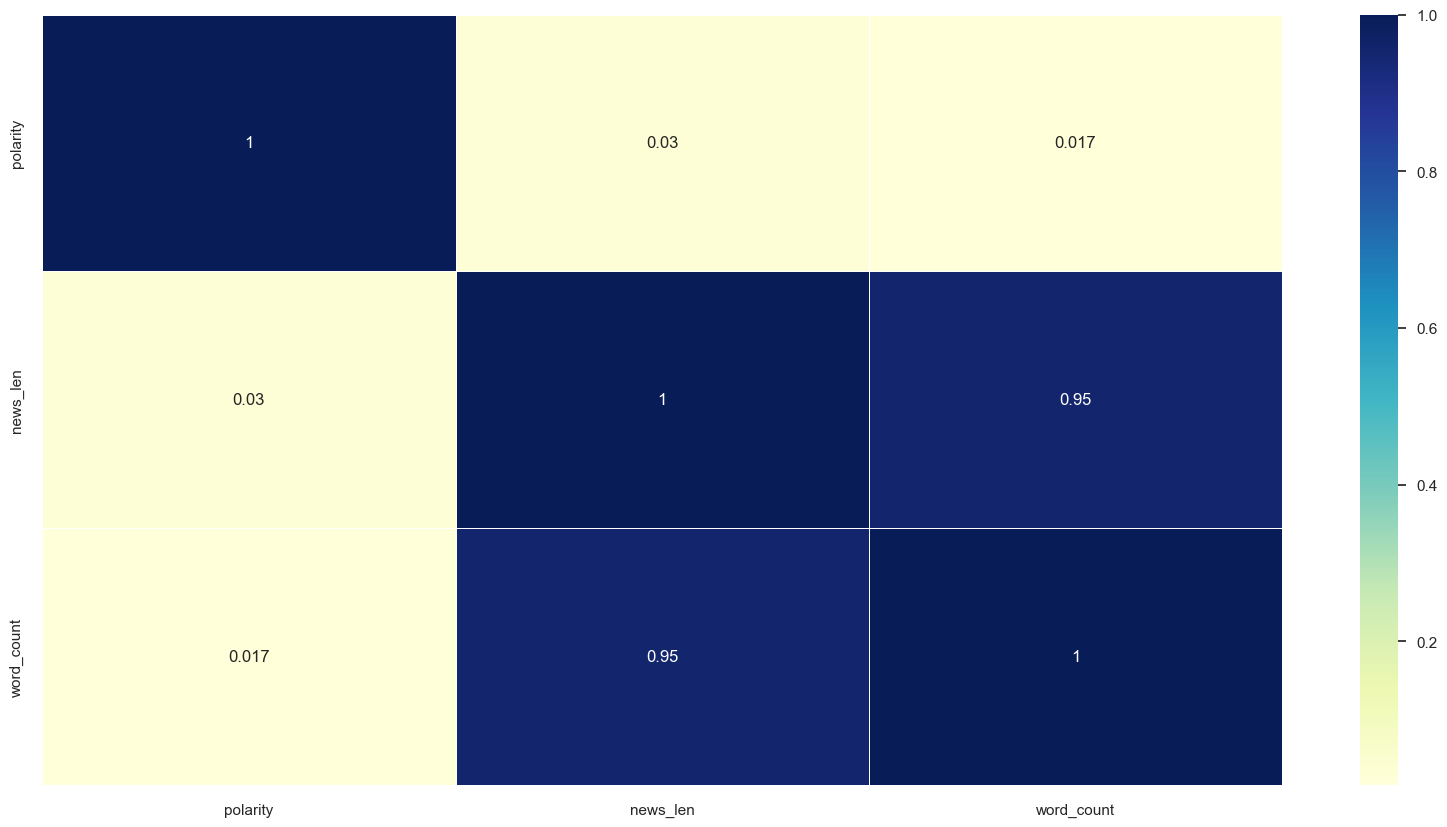

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(20,10)) # maximizing the size of graph
ax = sns.heatmap(df.corr(), annot=True, cmap="YlGnBu", linewidths=.5, ax=ax)

Step 6 : Splitting Data for Evaluation
Split the Data in three Parts

-Train for Initial Selection
-Val for Validation & Optimization

# Handling imbalance (oversampling)

In [48]:
from sklearn.utils import resample
# Separate majority and minority classes in training data for upsampling 
data_majority = df[df['sentiment'] == "positive"]
data_minority = df[df['sentiment'] == "negative"]

print("majority class before upsample:",data_majority.shape)
print("minority class before upsample:",data_minority.shape)

# Upsample minority class
data_minority_upsampled = resample(data_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples= data_majority.shape[0],    # to match majority class
                                 random_state=123) # reproducible results
 
# Combine majority class with upsampled minority class
df_balance = pd.concat([data_majority, data_minority_upsampled])
 
# Display new class counts
print("After upsampling\n",df_balance.sentiment.value_counts(),sep = "")

majority class before upsample: (1363, 5)
minority class before upsample: (604, 5)
After upsampling
positive    1363
negative    1363
Name: sentiment, dtype: int64


This code balances the dataset by upsampling the minority class (negative sentiment) to match the majority class (positive sentiment), ensuring equal representation for training a machine learning model on financial news sentiment analysis.

In [49]:
# y = df["sentiment"]
# x = df.drop(["sentiment"], axis=1)
# X_train, X_test, y_train, y_test = train_test_split(x, y, stratify=y, test_size=0.2, shuffle=True, random_state=5)

In [50]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df.news, df.sentiment, test_size=0.1, random_state=42)
X_train.shape , X_test.shape, y_train.shape, y_test.shape

((1770,), (197,), (1770,), (197,))

# Checking distribution of target variable

# 80% for training and 20% for testing

In [51]:
print('Distribution of sentiment in training set')
print(y_train.value_counts())

print('Distribution of sentiment in test set')
print(y_test.value_counts())

Distribution of sentiment in training set
positive    1230
negative     540
Name: sentiment, dtype: int64
Distribution of sentiment in test set
positive    133
negative     64
Name: sentiment, dtype: int64


In [52]:
print('----------------Training Set-------')
print(X_train.shape)
print(y_train.shape)

print('----------------Test Set-------')
print(X_test.shape)
print(y_test.shape)

----------------Training Set-------
(1770,)
(1770,)
----------------Test Set-------
(197,)
(197,)


# Modeling

# Tokenizer

In [53]:
from tensorflow.keras.preprocessing.text import Tokenizer

token = Tokenizer()
token.fit_on_texts(X_train)

In [54]:
vocab = len(token.index_word) + 1
print("Vocabulary size={}".format(len(token.word_index)))
print("Number of Documents={}".format(token.document_count))

Vocabulary size=4806
Number of Documents=1770


# Sequence

In [55]:
X_train = token.texts_to_sequences(X_train)
X_test = token.texts_to_sequences(X_test)

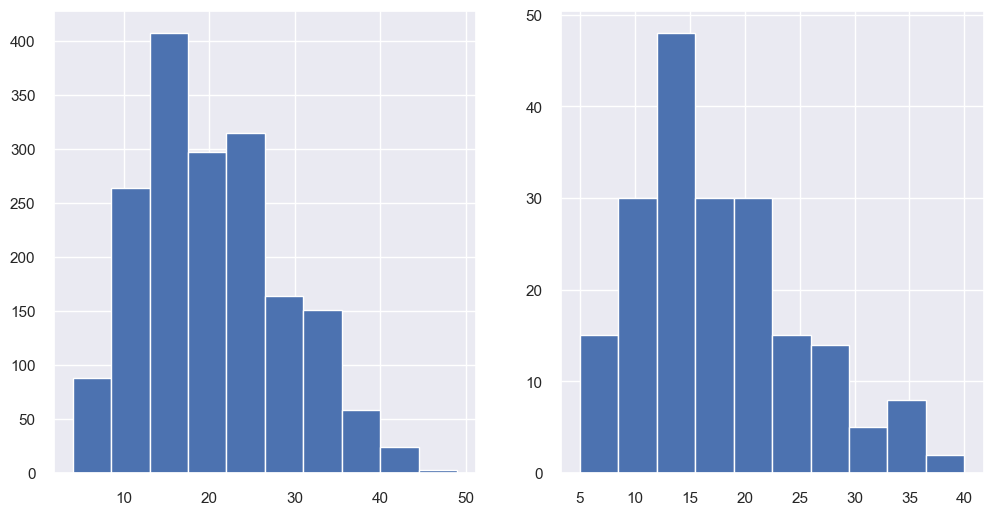

In [56]:
%matplotlib inline

train_lens = [len(s) for s in X_train]
test_lens = [len(s) for s in X_test]

fig, ax = plt.subplots(1,2, figsize=(12, 6))
h1 = ax[0].hist(train_lens)
h2 = ax[1].hist(test_lens)

In [57]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

#padding
MAX_SEQUENCE_LENGTH = 30
X_train = pad_sequences(X_train, maxlen=MAX_SEQUENCE_LENGTH, padding="post")
X_test = pad_sequences(X_test, maxlen=MAX_SEQUENCE_LENGTH, padding="post")
X_train.shape, X_test.shape

((1770, 30), (197, 30))

# Encoding Labels

# Processing Encoding and One-Hot Encoding

In [58]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
num_classes=2 # positive -> 1, negative -> 0

In [59]:
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

# Build Model

In [60]:
import tensorflow as tf 

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, Activation, Dropout
from tensorflow.keras.layers import Conv1D, MaxPooling1D, GlobalMaxPooling1D 

vec_size = 300
model = Sequential()
model.add(Embedding(vocab, vec_size, input_length=MAX_SEQUENCE_LENGTH))
model.add(Conv1D(64,8, activation="relu"))
model.add(MaxPooling1D(2))
model.add(Dropout(0.1))

model.add(Dense(8, activation="relu"))
model.add(Dropout(0.1))
model.add(Dense(4, activation='relu'))
model.add(Dropout(0.1))
model.add(GlobalMaxPooling1D())
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer=tf.optimizers.Adam(learning_rate=0.0001), metrics=['accuracy'])
model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 30, 300)           1442100   
                                                                 
 conv1d (Conv1D)             (None, 23, 64)            153664    
                                                                 
 max_pooling1d (MaxPooling1  (None, 11, 64)            0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 11, 64)            0         
                                                                 
 dense (Dense)               (None, 11, 8)             520       
                                                                 
 dropout_1 (Dropout)         (None, 11, 8)             0         
                                                      

# Train model

In [61]:
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint

epochs = 10
batch_size = 4

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)
mc = ModelCheckpoint('./model/sentiment_model.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)
history = model.fit(X_train, y_train,  batch_size=batch_size, shuffle=True, validation_split=0.1, epochs=epochs, verbose=1, callbacks=[es, mc])

Epoch 1/10


396/399 [============================>.] - ETA: 0s - loss: 0.6592 - accuracy: 0.6824
Epoch 1: val_accuracy improved from -inf to 0.73446, saving model to ./model\sentiment_model.h5
399/399 [==============================] - 8s 15ms/step - loss: 0.6586 - accuracy: 0.6836 - val_loss: 0.6152 - val_accuracy: 0.7345
Epoch 2/10
397/399 [============================>.] - ETA: 0s - loss: 0.6358 - accuracy: 0.6895
Epoch 2: val_accuracy did not improve from 0.73446
399/399 [==============================] - 6s 14ms/step - loss: 0.6352 - accuracy: 0.6905 - val_loss: 0.6107 - val_accuracy: 0.7345
Epoch 3/10
397/399 [============================>.] - ETA: 0s - loss: 0.6264 - accuracy: 0.6914
Epoch 3: val_accuracy improved from 0.73446 to 0.75141, saving model to ./model\sentiment_model.h5
399/399 [==============================] - 6s 14ms/step - loss: 0.6258 - accuracy: 0.6924 - val_loss: 0.6024 - val_accuracy: 0.7514
Epoch 4/10
397/399 [============================>.] - ETA: 0s - loss

# Evaluation

# Model Accuracy

In [62]:
from keras.models import load_model

saved_model = load_model('./model/sentiment_model.h5')
train_acc = saved_model.evaluate(X_train, y_train, verbose=1)
test_acc = saved_model.evaluate(X_test, y_test, verbose=1)
print('Train: %.2f%%, Test: %.2f%%' % (train_acc[1]*100, test_acc[1]*100))

7/7 [==============================] - 0s 5ms/step - loss: 0.2723 - accuracy: 0.9036
Train: 97.29%, Test: 90.36%


# Identify Overfitting

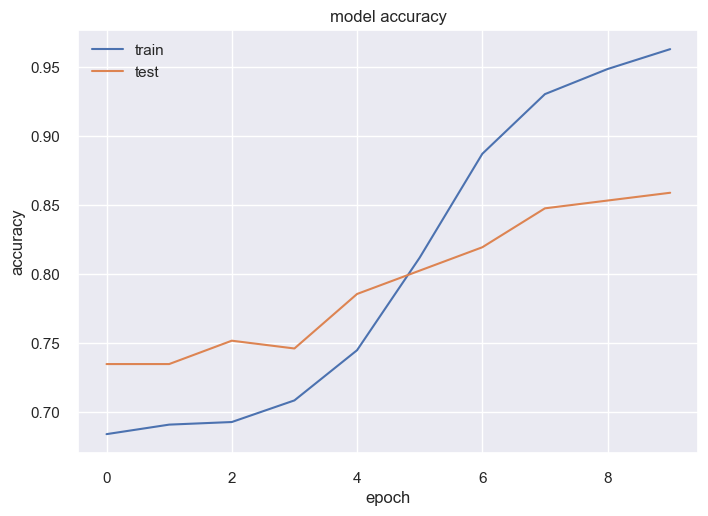

In [63]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

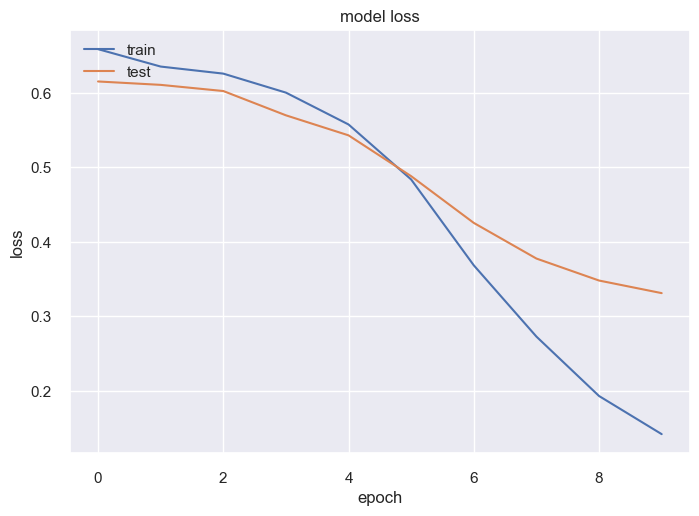

In [64]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Model Evaluation

# Confusion Matrix

In [65]:
def predictions(x):
    prediction_probs = model.predict(x)
    predictions = [1 if prob > 0.5 else 0 for prob in prediction_probs]
    return predictions

In [66]:
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

labels = ['positive', 'negative']
print("Accuracy: %.2f%%" % (accuracy_score(y_test, predictions(X_test))*100))
print("Precision: %.2f%%" % (precision_score(y_test, predictions(X_test), average="macro")*100))
print("Recall: %.2f%%" % (recall_score(y_test, predictions(X_test), average="macro")*100))
print("F1_score: %.2f%%" % (f1_score(y_test, predictions(X_test), average="macro")*100))
print('================================================\n') 
print(classification_report(y_test, predictions(X_test)))
pd.DataFrame(confusion_matrix(y_test, predictions(X_test)), index=labels, columns=labels)

7/7 [==============================] - 0s 7ms/step
Accuracy: 90.36%
7/7 [==============================] - 0s 4ms/step
Precision: 91.58%
7/7 [==============================] - 0s 3ms/step
Recall: 86.37%
7/7 [==============================] - 0s 2ms/step
F1_score: 88.33%

7/7 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.94      0.75      0.83        64
           1       0.89      0.98      0.93       133

    accuracy                           0.90       197
   macro avg       0.92      0.86      0.88       197
weighted avg       0.91      0.90      0.90       197

7/7 [==============================] - 0s 5ms/step


,positive,negative
positive,48,16
negative,3,130


# Report Analyzation :

.Precision: Out of all instances predicted as positive, 89% were actually positive.
.Recall: Out of all actual positive instances, the model correctly identified 98%.
.F1-score: A balance between precision and recall, providing an overall measure of a model's accuracy.
    
Confusion Matrix Details:
    
.True Positive (TP): 48 instances were correctly predicted as positive.
.False Positive (FP): 16 instances were predicted as positive but were actually negative.
.True Negative (TN): 130 instances were correctly predicted as negative.
.False Negative (FN): 3 instances were predicted as negative but were actually positive.

# ROC AUC CURVE 

In [68]:
def plot_roc_curve(y_test, y_pred):
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    plt.plot(fpr, tpr)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

7/7 [==============================] - 0s 5ms/step
model AUC score: 86.37%


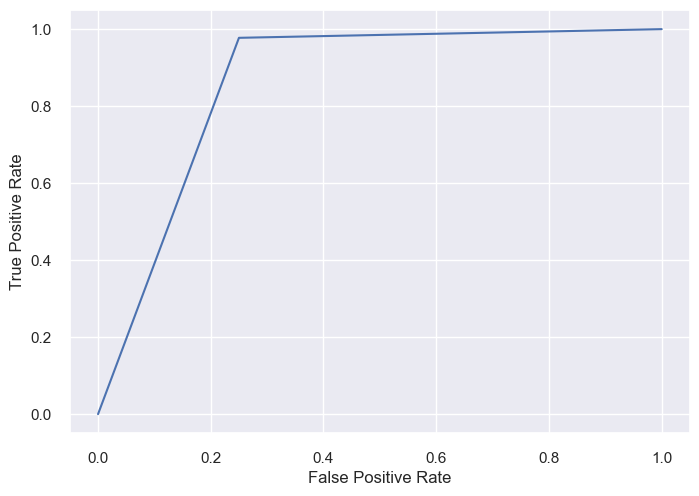

In [69]:
plot_roc_curve(y_test, predictions(X_test))
print("model AUC score: %.2f%%" % (roc_auc_score(y_test, predictions(X_test))*100))

# 4. Summary :

.The model performs very well with an accuracy of greater than 90%.

.High precision and recall for the positive class suggest a strong ability to correctly identify positive instances.

.The confusion matrix provides detailed insights into the model's predictions, indicating low false positive and false negative rates.

.In conclusion, this model seems to be highly effective in distinguishing between positive and negative instances, with a particularly high performance on the positive class.